**Installing required modules**

In [ ]:
!pip install PyPortfolioOpt
!pip install yfinance
#importing libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from pypfopt import plotting
from matplotlib.pyplot import figure
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pandas_datareader import data as pdr
import sys
from multiprocessing import Pool
import seaborn as sns
import yfinance as yfin
yfin.pdr_override()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing datasets from Yahoo**

In [ ]:
#Tickers
#SnP = ['AAPL','ABBV','ABT','ACN','AIG','AMGN','AMZN','AXP','BAC','BIIB','BK','BLK','BMY','CAT','CL','CMCSA','COF','COP','CSCO','CVS','DD','DHR','DIS','DUK','EMR','EXC','F','META','FDX','FOX','FOXA','GD','GE','GILD','GM','GOOG','GOOGL','GS','HAL','HD','HON','IBM', 'IRX','INTC','JNJ','JPM','KMI','KO','LLY','LMT','MA','MCD','MDLZ','MDT','MET','MMM','MO','MON','MRK','MS','MSFT','NEE','NKE','ORCL','PEP','PFE','PG','PM','PYPL','QCOM','SBUX','SLB','SO','SPG','T','TGT','TXN','UNH','UNP','UPS','V','VZ','WBA','WFC']
SnP =['META','AAPL','NFLX','GOOG', 'AIG', 'QCOM', "EMC", "FB", "IRX"]

#Initialize the dates:
StockStartDate = '2013-01-01'
StockEndDate = datetime.today().strftime('%Y-%m-%d')

In [ ]:
#Create dataframe for "ADJ CLOSE" of the stocks
df = pd.DataFrame()

#Store the adj close

for stock in SnP:
  df[stock] = pdr.get_data_yahoo(stock, start = StockStartDate, end = StockEndDate)['Adj Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FB: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


In [ ]:
'''
TYX = pd.DataFrame()
IRX = pd.DataFrame()
TNX = pd.DataFrame()
'''
'''

StockStartDate = '2013-01-01'
StockEndDate = datetime.today().strftime('%Y-%m-%d')


TYX = pdr.get_data_yahoo('TYX', start = StockStartDate, end = StockEndDate)['Close']
IRX = pdr.get_data_yahoo('IRX', start = StockStartDate, end = StockEndDate)['Close']

TNX = pdr.get_data_yahoo('TNX', start = StockStartDate, end = StockEndDate)['Close']

'''

"\n\nStockStartDate = '2013-01-01'\nStockEndDate = datetime.today().strftime('%Y-%m-%d')\n\n\nTYX = pdr.get_data_yahoo('TYX', start = StockStartDate, end = StockEndDate)['Close']\nIRX = pdr.get_data_yahoo('IRX', start = StockStartDate, end = StockEndDate)['Close']\n\nTNX = pdr.get_data_yahoo('TNX', start = StockStartDate, end = StockEndDate)['Close']\n\n"

In [ ]:
#df = df.merge(IRX, on = "Date")

#IRX.columns = IRX.columns.str.replace("Close","IRX")
df

,META,AAPL,NFLX,GOOG,AIG,QCOM,EMC,FB,IRX
Date,,,,,,,,,
2013-01-02,28.000000,16.862825,13.144286,18.013729,29.553614,48.689087,5338.169922,NaN,NaN
2013-01-03,27.770000,16.649981,13.798571,18.024191,29.310574,48.463516,5338.169922,NaN,NaN
2013-01-04,28.760000,16.186199,13.711429,18.380356,29.407776,47.749146,5338.169922,NaN,NaN
2013-01-07,29.420000,16.090988,14.171429,18.300158,29.108036,48.132652,5250.660156,NaN,NaN
2013-01-08,29.059999,16.134289,13.880000,18.264042,28.881195,48.057449,5075.629883,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-12,114.709999,144.490005,315.179993,93.559998,63.190250,121.209999,NaN,NaN,NaN
2022-12-13,120.150002,145.470001,320.339996,95.849998,63.240002,123.489998,NaN,NaN,NaN
2022-12-14,121.589996,143.210007,317.829987,95.309998,62.660000,121.709999,NaN,NaN,NaN


<function matplotlib.pyplot.show(*args, **kw)>

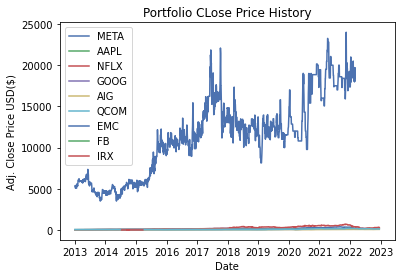

In [ ]:
#visualize the path of the portfolio stocks
title = "Portfolio CLose Price History"

# Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)


plt.title(title)
plt.xlabel("Date")
plt.ylabel("Adj. Close Price USD($)")
plt.legend(my_stocks.columns.values, loc = "upper left")
plt.show

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2509 entries, 2013-01-02 to 2022-12-16
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   META    2509 non-null   float64
 1   AAPL    2509 non-null   float64
 2   NFLX    2509 non-null   float64
 3   GOOG    2509 non-null   float64
 4   AIG     2509 non-null   float64
 5   QCOM    2509 non-null   float64
 6   EMC     2296 non-null   float64
 7   FB      0 non-null      float64
 8   IRX     164 non-null    float64
dtypes: float64(9)
memory usage: 196.0 KB


In [ ]:
df.describe()

,META,AAPL,NFLX,GOOG,AIG,QCOM,EMC,FB,IRX
count,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2296.000000,0.0,164.000000
mean,155.718796,60.384305,238.868741,59.209914,45.710304,74.980124,11375.164001,NaN,0.057872
std,84.021339,49.155224,174.518154,35.187895,8.397475,37.195644,4772.148058,NaN,0.015015
min,22.900000,12.064589,13.144286,17.506132,17.395599,34.695278,3500.439941,NaN,0.037000
25%,85.879997,24.651932,89.230003,29.954971,40.550194,49.546322,6125.770020,NaN,0.048000
50%,151.529999,39.226997,189.940002,51.287998,46.907932,56.776516,11530.200195,NaN,0.051000
75%,194.779999,88.341309,362.149994,73.273003,51.700291,86.021156,14319.799805,NaN,0.066250
max,382.179993,180.959747,691.690002,150.709000,63.384270,185.279007,24000.000000,NaN,0.085000


In [ ]:
df.iloc[-500].max()

18600.0

Here the EMC appears to be an outlier as the returns are significantly higher than other assets. IRX on the otherhand seems to have extremely low values and the number of observation is scarce. FB data seems to be unavailabe, as its ticker changed to META.


In [ ]:
#Finding outliers
for i in df.columns:
  print(f'{i} = {df[i].iloc[-40]}')

META = 130.00999450683594
AAPL = 147.02610778808594
NFLX = 289.57000732421875
GOOG = 101.4800033569336
AIG = 52.98190689086914
QCOM = 115.00672149658203
EMC = nan
FB = nan
IRX = nan


In [ ]:
df = df.drop(['EMC', 'FB', "IRX"], axis=1)
df

,META,AAPL,NFLX,GOOG,AIG,QCOM
Date,,,,,,
2013-01-02,28.000000,16.862829,13.144286,18.013729,29.553606,48.689091
2013-01-03,27.770000,16.649973,13.798571,18.024191,29.310570,48.463509
2013-01-04,28.760000,16.186201,13.711429,18.380356,29.407784,47.749142
2013-01-07,29.420000,16.090988,14.171429,18.300158,29.108034,48.132652
2013-01-08,29.059999,16.134289,13.880000,18.264042,28.881193,48.057465
...,...,...,...,...,...,...
2022-12-12,114.709999,144.490005,315.179993,93.559998,63.190250,121.209999
2022-12-13,120.150002,145.470001,320.339996,95.849998,63.240002,123.489998
2022-12-14,121.589996,143.210007,317.829987,95.309998,62.660000,121.709999


Without outliers

<function matplotlib.pyplot.show(*args, **kw)>

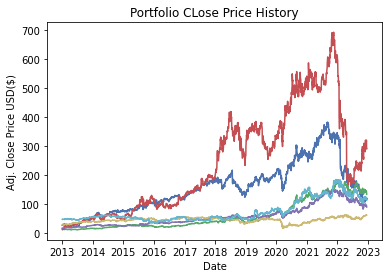

In [ ]:
#visualize the path of the portfolio stocks
title = "Portfolio CLose Price History"

# Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)


plt.title(title)
plt.xlabel("Date")
plt.ylabel("Adj. Close Price USD($)")
#plt.legend(my_stocks.columns.values, loc = "upper left")
plt.show

Creating equal weights using numpy array

In [ ]:
#The sum of the entire weights should be 1
weights = np.array([1/(len(df.columns))]*(len(df.columns)))
weights

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

In [ ]:
#Show the daily simple return
returns = df.pct_change()
returns 


,META,AAPL,NFLX,GOOG,AIG,QCOM
Date,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,-0.012623,0.049777,0.000581,-0.008224,-0.004633
2013-01-04,0.035650,-0.027854,-0.006315,0.019760,0.003317,-0.014740
2013-01-07,0.022949,-0.005882,0.033549,-0.004363,-0.010193,0.008032
2013-01-08,-0.012237,0.002691,-0.020565,-0.001974,-0.007793,-0.001562
...,...,...,...,...,...,...
2022-12-12,-0.010267,0.016390,-0.015093,0.005265,0.015997,0.018144
2022-12-13,0.047424,0.006782,0.016372,0.024476,0.000787,0.018810
2022-12-14,0.011985,-0.015536,-0.007835,-0.005634,-0.009171,-0.014414


Graph of the returns

<function matplotlib.pyplot.show(*args, **kw)>

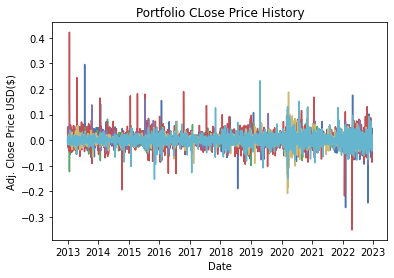

In [ ]:
#visualize the path of the portfolio stocks
title = "Portfolio CLose Price History"

# Get the stocks returns
my_stocks = returns

#Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)


plt.title(title)
plt.xlabel("Date")
plt.ylabel("Adj. Close Price USD($)")
#plt.legend(my_stocks.columns.values, loc = "upper left")
plt.show

The returns seems to be mean reverting, like interest rate, which is a good characteristic for time series modelling

In [ ]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252

cov_matrix_annual

,META,AAPL,NFLX,GOOG,AIG,QCOM
META,0.145239,0.053143,0.074954,0.061371,0.036572,0.049842
AAPL,0.053143,0.084424,0.043600,0.044986,0.033257,0.051322
NFLX,0.074954,0.043600,0.228294,0.056222,0.028474,0.048684
GOOG,0.061371,0.044986,0.056222,0.073490,0.035048,0.045233
AIG,0.036572,0.033257,0.028474,0.035048,0.101715,0.038510
QCOM,0.049842,0.051322,0.048684,0.045233,0.038510,0.118393


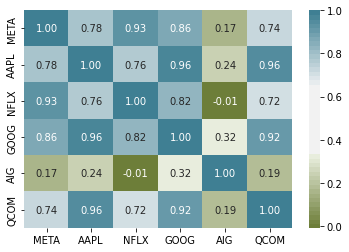

In [ ]:
# compute correlation matrix
my_cmap = sns.diverging_palette(100, 220, sep=80, n=50)
sns.heatmap(df.corr(), annot=True, fmt=".02f", cmap=my_cmap);

In [ ]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252

Return of a equally weighted portfolio

In [ ]:
# Create and show the portoflio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.05983299863922583

In [ ]:
#calculate the portfolio volatility
port_volatility = np.sqrt(port_variance)
port_volatility

0.24460784664279644

In [ ]:
#Calculate the annual portoflio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() *weights)*252
portfolioSimpleAnnualReturn

0.22759732954775505

Portfolio optimization

In [ ]:
#Portfolio Optimization

#Calc the exp returns and the anualized smaple covariance matrix of the asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#Optimize for max sharpe ratio 
ef = EfficientFrontier(mu,S)

w_sharpe = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


OrderedDict([('META', 0.0), ('AAPL', 0.59721), ('NFLX', 0.36042), ('GOOG', 0.04237), ('AIG', 0.0), ('QCOM', 0.0)])
Expected annual return: 27.8%
Annual volatility: 28.8%
Sharpe Ratio: 0.90


(0.27757275917111635, 0.2875092449176233, 0.8958764412772733)

In [ ]:
perf = ef.portfolio_performance()[1]
l = list(ef.portfolio_performance())

In [ ]:
perf

0.2875092449176233

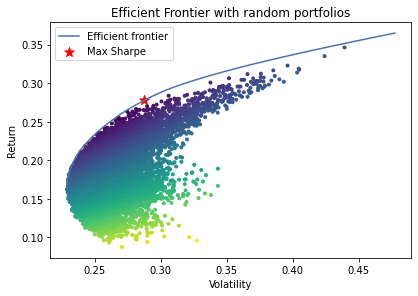

<Figure size 1440x1008 with 0 Axes>

In [ ]:

ef = EfficientFrontier(mu,S)
fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
plt.figure(figsize = (20,14))

ax.set_title("Efficient Frontier with random portfolios")
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
capital = 10000
weights = cleaned_weights
print(weights)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value= capital)

allocation, leftover = da.lp_portfolio()
print("discrete Allocairton :", allocation)
print("Fund remaining :" , leftover)

OrderedDict([('META', 0.0), ('AAPL', 0.59721), ('NFLX', 0.36042), ('GOOG', 0.04237), ('AIG', 0.0), ('QCOM', 0.0)])
discrete Allocairton : {'AAPL': 44, 'NFLX': 12, 'GOOG': 5}
Fund remaining : 138.74033880510615


/usr/local/lib/python3.8/dist-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [ ]:
w_minvar = list(weights.values())
for i in range(len(w_minvar)):
  print(f'{SnP[i]} with wieghts = {w_minvar[i]}')

META with wieghts = 0.0
AAPL with wieghts = 0.59721
NFLX with wieghts = 0.36042
GOOG with wieghts = 0.04237
AIG with wieghts = 0.0
QCOM with wieghts = 0.0


In [ ]:
print(f'If we are investing {capital} into {SnP} stocks with the above mentioned weights, then we get a return of {l[1]*100}% and a sharpe ratio of {l[2]}')

print(f'the number of corresponding stocks that we need to buy are \n {allocation}')

If we are investing 10000 into ['META', 'AAPL', 'NFLX', 'GOOG', 'AIG', 'QCOM', 'EMC', 'FB', 'IRX'] stocks with the above mentioned weights, then we get a return of 28.75092449176233% and a sharpe ratio of 0.8958764412772733
the number of corresponding stocks that we need to buy are 
 {'AAPL': 44, 'NFLX': 12, 'GOOG': 5}


Comparison between equaly weighted portfolio and optimized portofolio

In [ ]:
print(f'Difference in return = {l[1]*100 -portfolioSimpleAnnualReturn*100}%')
print(f'Difference in Volatility = {(perf -port_volatility)*100}%')

Difference in return = 5.991191536986825%
Difference in Volatility = 4.290139827482687%
